## Integrantes:
### Adrián Tavera Aquino - A01659113
### Daniela Robles Estrada - A01659074
### Elian Alejandro Lopez de Alba - A01659582



## Sección 1: Configuración del proyecto y carga de datos

En esta primera etapa cargamos la base de datos y realizamos una inspección inicial para asegurarnos de que la información esté completa.

### Objetivo de la inspección inicial

La inspección inicial nos permite:

- Ver las primeras filas del dataset para confirmar que se cargó correctamente.
- Revisar la estructura y tipos de datos de cada columna.
- Verificar que no existan valores faltantes.
- Obtener estadísticas generales de las variables numéricas.
- Calcular la tasa de incumplimiento para confirmar que coincide con el contexto del caso (~28% de defaults).

Esta revisión asegura que los datos sean adecuadas para continuar con el análisis exploratorio.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, roc_auc_score, RocCurveDisplay
)

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [ ]:

df = pd.read_csv("credit_risk_data-1.csv")

df.head()


,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 15  mari

In [ ]:
df.describe()


,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability,loan_status
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,155716.305344,67707.807596,6.675640,0.634643,681.728400,0.358176,0.740733,3.451600,0.408094,0.320784,175666.741236,42.045600,6.023200,0.265600
std,149605.357952,27302.931731,3.488021,0.293276,88.683309,0.289995,0.285966,2.083793,0.224736,0.192079,182652.568930,12.092395,3.205397,0.441741
min,5000.000000,15000.000000,0.000000,0.011000,334.000000,0.004000,0.029000,0.000000,0.009000,0.000000,550.630000,18.000000,0.000000,0.000000
25%,42984.517500,47475.317500,4.000000,0.375500,642.750000,0.131000,0.517500,2.000000,0.228000,0.161000,49513.082500,34.000000,3.600000,0.000000
50%,97054.315000,66963.475000,6.700000,0.752000,700.000000,0.246000,0.880500,3.000000,0.359000,0.327000,121018.750000,42.000000,5.900000,0.000000
75%,213214.992500,87347.642500,9.300000,0.866000,743.000000,0.592250,0.956000,5.000000,0.565000,0.464000,235513.902500,50.000000,8.400000,1.000000
max,500000.000000,149929.960000,19.300000,0.999000,850.000000,0.998000,1.000000,11.000000,0.979000,0.893000,1000000.000000,75.000000,16.400000,1.000000


In [ ]:
df['loan_status'].value_counts(normalize=True) * 100


,proportion
loan_status,
0,73.44
1,26.56


## Sección 2: EDA

# **EDA**

In [ ]:
# Distribución del estado del préstamo
target_counts = df['loan_status'].value_counts().reindex([0,1]).fillna(0)
fig = px.bar(
    x=['Good Loan (0)','Default (1)'],
    y=target_counts.values,
    color=['#4CAF50','#E53935'],
    text=[f'{v:,.0f}' for v in target_counts.values],
    labels={'x':'Clase', 'y':'Conteo'},
    title='Distribución de la variable objetivo (loan_status)'
)
fig.update_traces(textposition='outside')
fig.update_layout(yaxis=dict(tickformat=','))
fig.show()

default_rate = df['loan_status'].mean()
print(f"Good Loan Rate: {(1-default_rate):.2%}")
print(f"Default Rate: {default_rate:.2%}")



Good Loan Rate: 73.44%
Default Rate: 26.56%


Observamos que ~26% de los clientes caen en default y ~74% no lo hacen. Esto confirma el desbalance esperado y da contexto para interpretar patrones de riesgo.

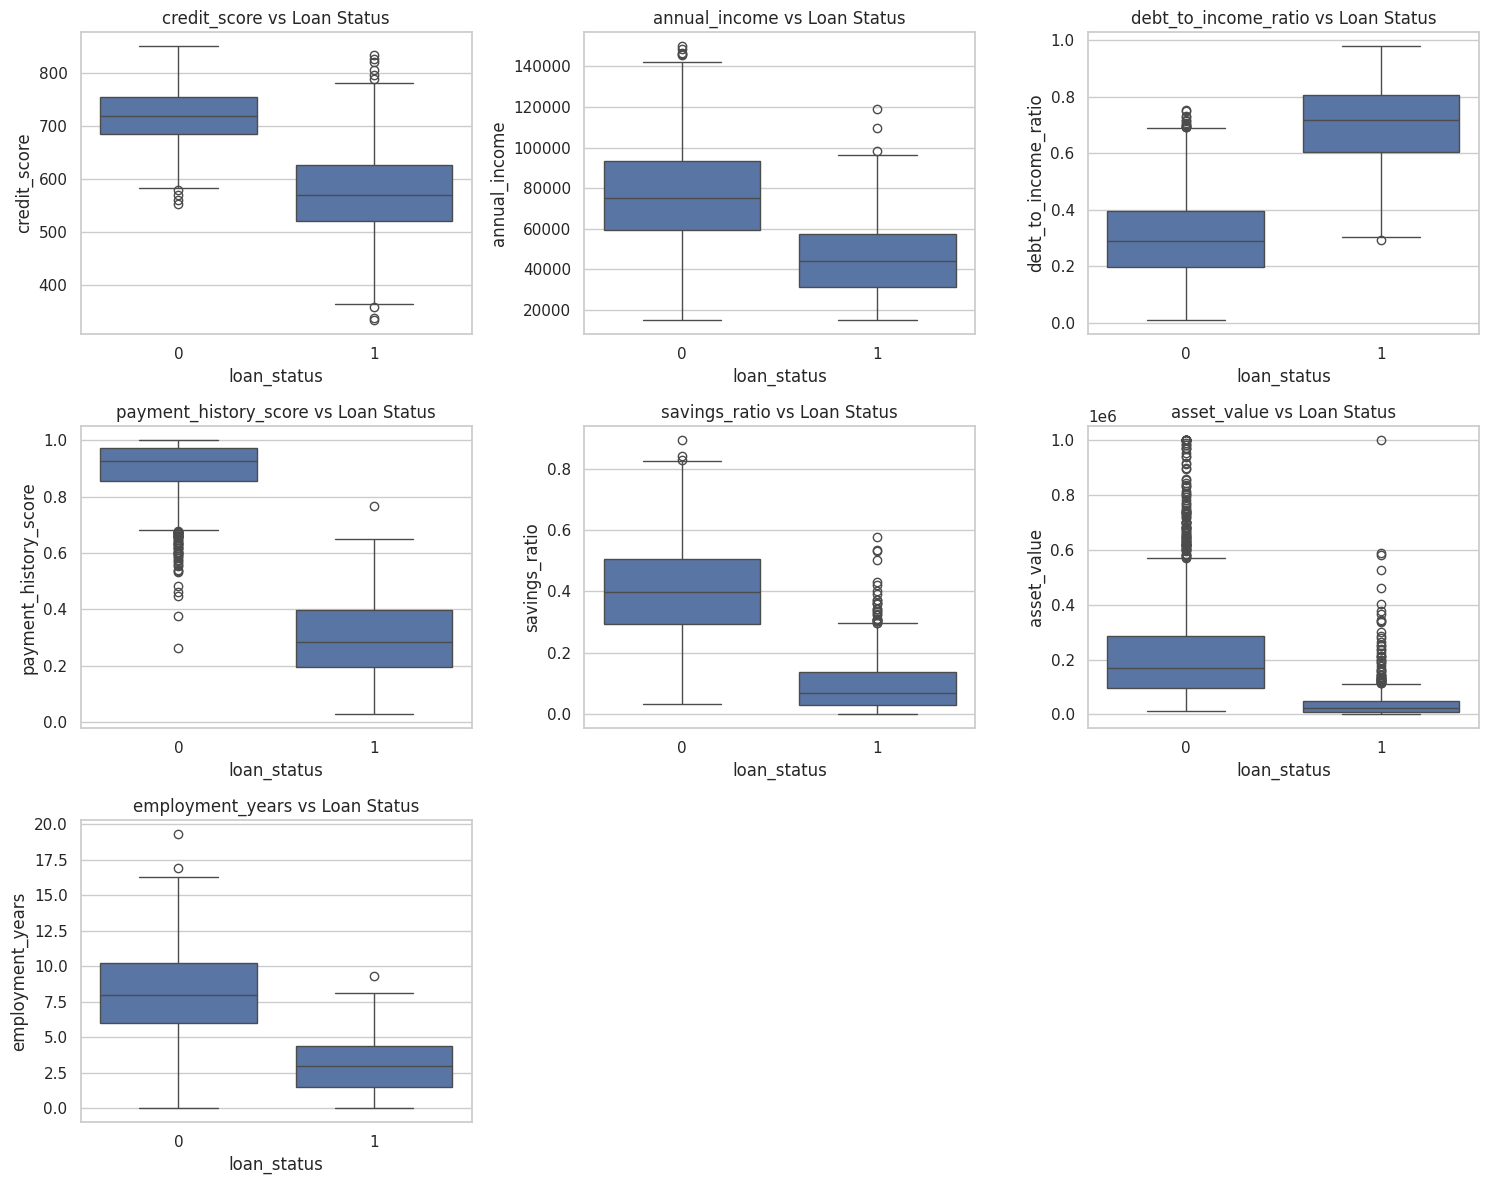

In [ ]:
num_vars = ['credit_score', 'annual_income', 'debt_to_income_ratio',
            'payment_history_score', 'savings_ratio', 'asset_value', 'employment_years']

plt.figure(figsize=(15,12))
for i, col in enumerate(num_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f'{col} vs Loan Status')
plt.tight_layout()
plt.show()


### Explicación de las gráficas (boxplots)

**1. Credit Score**
Las personas que no caen en default tienen un puntaje crediticio mucho más alto.  
Las que sí caen en default suelen tener puntajes más bajos.  


**2. Annual Income**
Las personas que pagan bien ganan más dinero en promedio.  
Las que caen en default tienen ingresos más bajos.  


**3. Debt-to-Income Ratio**
Las personas que caen en default tienen más deuda en comparación con lo que ganan.

**4. Payment History Score**
Quienes no caen en default casi siempre tienen buen comportamiento de pago previo.  
Los que sí caen en default tienen peores antecedentes.  


**5. Savings Ratio**
Los buenos pagadores ahorran más.  
Los que caen en default casi no ahorran.  


**6. Asset Value**
Las personas que pagan tienen más bienes o patrimonio.  
Los que caen en default tienen muy pocos.  


**7. Employment Years**
Los buenos pagadores llevan más años trabajando.  
Los que caen en default tienen menos tiempo en el mismo empleo.  




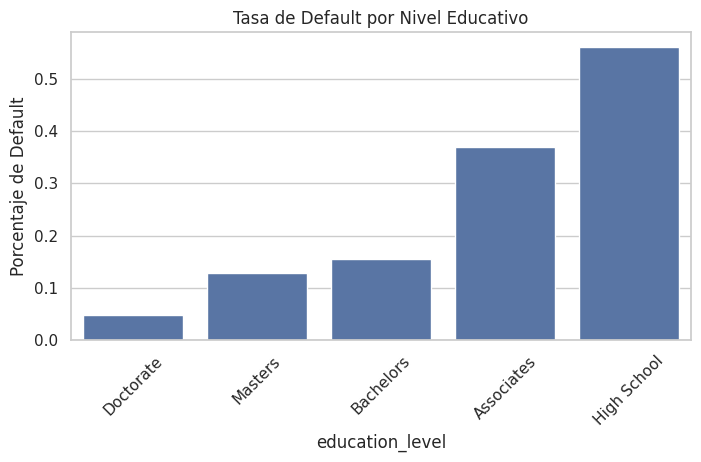

In [ ]:
edu_default = df.groupby('education_level')['loan_status'].mean().sort_values()

plt.figure(figsize=(8,4))
sns.barplot(x=edu_default.index, y=edu_default.values)
plt.title("Tasa de Default por Nivel Educativo")
plt.ylabel("Porcentaje de Default")
plt.xticks(rotation=45)
plt.show()


### Nivel Educativo vs Default

A medida que aumenta el nivel educativo, la probabilidad de caer en default disminuye.

Los niveles educativos más bajos (Associates y High School) tienen las tasas más altas de default.


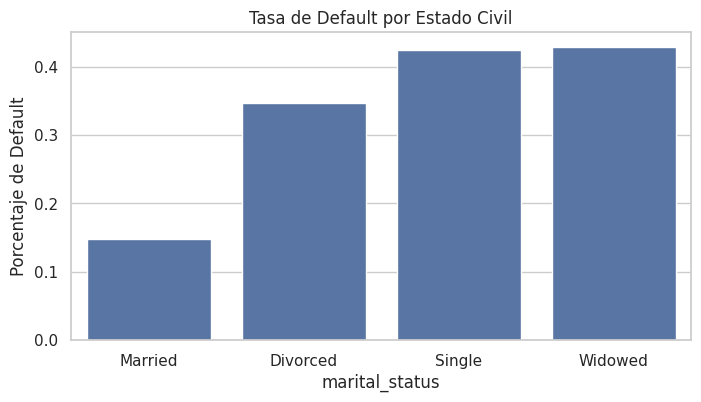

In [ ]:
mar_default = df.groupby('marital_status')['loan_status'].mean().sort_values()

plt.figure(figsize=(8,4))
sns.barplot(x=mar_default.index, y=mar_default.values)
plt.title("Tasa de Default por Estado Civil")
plt.ylabel("Porcentaje de Default")
plt.show()


### Estado Civil vs Default

Las personas casadas presentan la tasa más baja de default.  
Las tasas aumentan para personas divorciadas, solteras y viudas.



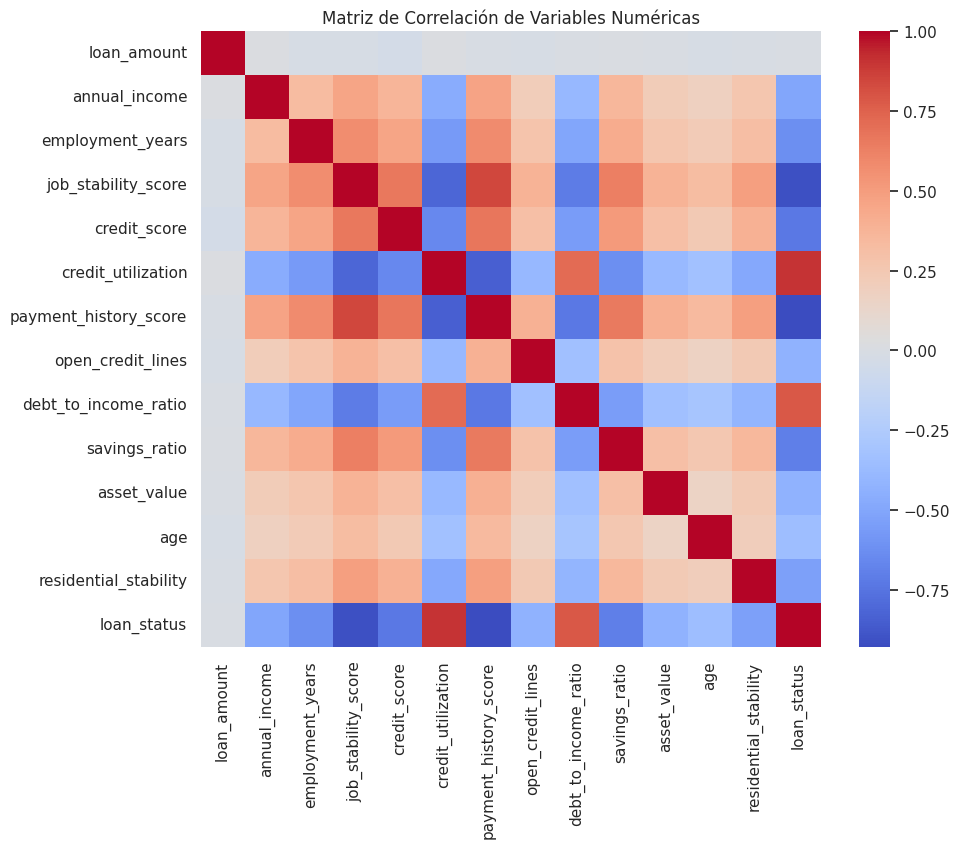

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


### Observaciones principales

- **credit_score** y **payment_history_score** están fuertemente relacionadas de forma positiva.  
Personas con mejor historial de pago también tienen mejor score crediticio.

- **debt_to_income_ratio** está relacionada de forma negativa con ingreso y assets.
Quienes ganan más y tienen más bienes suelen tener menor nivel de deuda relativa.

- **asset_value**, **annual_income** y **employment_years** tienen correlaciones positivas entre sí.  
Más años trabajando suele ir acompañado de mayor ingreso y patrimonio.

- **loan_status** (default) tiene correlación negativa con score crediticio, historial de pago, ahorro y valor de activos.  
A peor situación financiera y peor historial, más probabilidad de default.


Personas con más ingresos, mejor historial, más ahorro y más activos tienden a tener mejor comportamiento crediticio.  
Mientras que quienes tienen más deuda y peores antecedentes tienden a caer en default.

## Sección 3: Preprocesamiento de Datos

En esta parte preparamos el dataset para los modelos LDA y QDA, siguiendo exactamente las instrucciones del proyecto.

1. **Conversión de variables categóricas:**  
   Se transformaron las variables `education_level` y `marital_status` en variables dummy para que los modelos puedan procesarlas.  

2. **Definición de variables:**  
   `X` contiene todas las variables predictoras y `y` contiene la variable objetivo `loan_status`.

3. **División del conjunto de datos:**  
   Se dividió la información en entrenamiento (80%) y prueba (20%) con `random_state=42` para reproducibilidad.

4. **Estandarización:**  
   Se aplicó `StandardScaler` para escalar las variables numéricas.  
   El escalador se ajustó solo con los datos de entrenamiento (`fit` en `X_train`) y luego se aplicó a ambos conjuntos (`transform`), asegurando un proceso correcto y sin fugas de información.

Este preprocesamiento garantiza que los modelos trabajen con variables numéricas comparables y que las categorías estén correctamente representadas.


In [ ]:
# Convertir variables categóricas en variables dummy
df_encoded = pd.get_dummies(df, columns=['education_level', 'marital_status'], drop_first=True)

# Verificar columnas resultantes
df_encoded.head()


,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability,loan_status,education_level_Bachelors,education_level_Doctorate,education_level_High School,education_level_Masters,marital_status_Married,marital_status_Single,marital_status_Widowed
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,3.5,0,False,False,True,False,True,False,False
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,11.4,0,False,False,False,True,False,False,False
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,8.6,0,False,False,True,False,False,False,True
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,3.9,0,True,False,False,False,False,True,False
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,9.6,0,False,False,False,False,False,True,False


In [ ]:
# Definir variables predictoras (X) y objetivo (y)
X = df_encoded.drop(columns=['application_id', 'application_date', 'loan_status'])
y = df_encoded['loan_status']

print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)


Tamaño de X: (2500, 20)
Tamaño de y: (2500,)


In [ ]:
# Separar datos en entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)


Tamaño del set de entrenamiento: (2000, 20)
Tamaño del set de prueba: (500, 20)


In [ ]:
# Estandarización de variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Estandarización completa.")


Estandarización completa.


## Sección 4: LDA vs QDA

### 1. Normalidad multivariada
Ambos modelos asumen que las variables predictoras siguen una **distribución normal multivariada** dentro de cada clase (default y no default).  
Aunque en la práctica los datos financieros rara vez cumplen esta condición de forma perfecta, LDA y QDA suelen ser robustos y pueden funcionar bien si las desviaciones no son extremas.  
En la exploración anterior, las variables numéricas mostraron distribuciones razonables, sin valores extremos.

### 2. Homogeneidad de matrices de covarianza

La principal diferencia entre los dos modelos es la forma en que tratan las matrices de covarianza.  
LDA asume que las dos clases (default y no default) comparten la misma matriz de covarianza.  
Esto significa que la forma y orientación de las distribuciones son similares, y solo cambian sus medias. En consecuencia, LDA genera fronteras de decisión lineales.

Por otro lado, QDA no hace esta suposición. Permite que cada clase tenga su propia matriz de covarianza.  
Esto le da más flexibilidad y produce fronteras de decisión curvas o cuadráticas.


### 3. Hipótesis de modelado
- Si las covarianzas son similares entre clases, **LDA** es más estable, interpretable y evita sobreajuste.  
- Si las covarianzas son diferentes, **QDA** puede capturar mejor los patrones reales de los datos.

### 4. Hipótesis para nuestro caso
Dado que los clientes en default y no default probablemente tienen una **variabilidad financiera distinta** (por ejemplo, en ingreso, score o ahorro), es razonable esperar que las matrices de covarianza no sean iguales.  
Por ello, QDA podría tener un desempeño ligeramente mejor que LDA en este conjunto de datos.

---


## Sección 5: Modelo 1 — Linear Discriminant Analysis (LDA)

En esta sección entrenamos el modelo LDA utilizando los datos estandarizados de entrenamiento.

LDA busca encontrar una combinación lineal de variables que mejor separe a los clientes en dos grupos:
- **0:** No incumple el préstamo.
- **1:** Incumple (default).

In [ ]:
# Sección 5: Modelo 1 — Linear Discriminant Analysis (LDA)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Inicializar y entrenar el modelo
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

print("Modelo LDA entrenado correctamente.")


Modelo LDA entrenado correctamente.


In [ ]:
# Crear un DataFrame con los coeficientes y nombres de las variables
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lda.coef_[0]
})

# Ordenar por valor absoluto
coef_df['Importancia'] = coef_df['Coeficiente'].abs()
coef_df = coef_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 variables más importantes
coef_df.head(15)


,Variable,Coeficiente,Importancia
6,payment_history_score,-15.430231,15.430231
3,job_stability_score,-13.131575,13.131575
5,credit_utilization,12.379928,12.379928
8,debt_to_income_ratio,4.935355,4.935355
4,credit_score,-3.945625,3.945625
9,savings_ratio,-2.816468,2.816468
2,employment_years,-2.718709,2.718709
1,annual_income,-1.857590,1.857590
10,asset_value,-1.547768,1.547768
12,residential_stability,-1.537658,1.537658


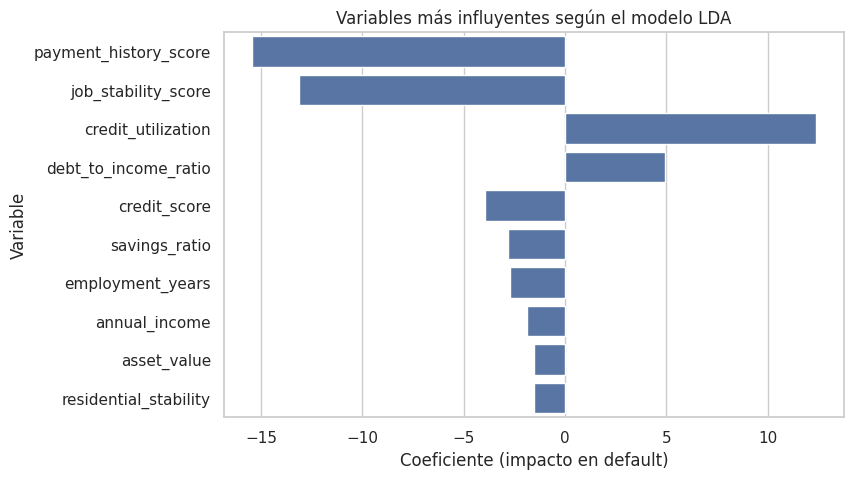

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df.head(10))
plt.title("Variables más influyentes según el modelo LDA")
plt.xlabel("Coeficiente (impacto en default)")
plt.ylabel("Variable")
plt.show()


En este gráfico vemos qué variables pesan más en el riesgo de incumplimiento.
Las barras hacia la izquierda (negativas) significan que reducen el riesgo, como tener buen historial de pago o empleo estable.
Las barras hacia la derecha (positivas) aumentan el riesgo, como usar mucho crédito o tener más deuda que ingreso.

## Sección 6: Modelo 2 — QDA

Entrenamos un modelo Quadratic Discriminant Analysis (QDA) con los datos estandarizados de entrenamiento.  
A diferencia de LDA, QDA **no asume** que las clases comparten la misma matriz de covarianza, por lo que puede capturar fronteras de decisión **curvas**.  
QDA no produce coeficientes lineales simples para interpretar, así que su comparación se hará por desempeño en la siguiente sección.


In [ ]:
# Sección 6: Modelo 2 — Quadratic Discriminant Analysis (QDA)

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Inicializar y entrenar QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

print("Modelo QDA entrenado correctamente.")


Modelo QDA entrenado correctamente.


## Sección 7: Evaluación y Comparación de Modelos

En esta sección se evaluó el desempeño de los modelos LDA y QDA usando el conjunto de prueba.  
Ambos alcanzaron una **precisión (accuracy) del 100 %**, con reportes de clasificación perfectos y matrices de confusión sin errores.  
Además, las curvas ROC mostraron un **AUC = 1.00** para ambos modelos, lo que indica una separación total entre clientes que incumplen y los que no.




In [ ]:
# Sección 7: Evaluación y Comparación de Modelos (LDA vs QDA)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Predicciones
y_pred_lda = lda.predict(X_test_scaled)
y_pred_qda = qda.predict(X_test_scaled)

# Probabilidades (para ROC)
y_prob_lda = lda.predict_proba(X_test_scaled)[:, 1]
y_prob_qda = qda.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# Calcular accuracy
acc_lda = accuracy_score(y_test, y_pred_lda)
acc_qda = accuracy_score(y_test, y_pred_qda)

print(f"Accuracy LDA: {acc_lda:.4f}")
print(f"Accuracy QDA: {acc_qda:.4f}")

# Reportes de clasificación
print("\n--- Reporte LDA ---")
print(classification_report(y_test, y_pred_lda))

print("\n--- Reporte QDA ---")
print(classification_report(y_test, y_pred_qda))


Accuracy LDA: 1.0000
Accuracy QDA: 1.0000

--- Reporte LDA ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       122

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500


--- Reporte QDA ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       122

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



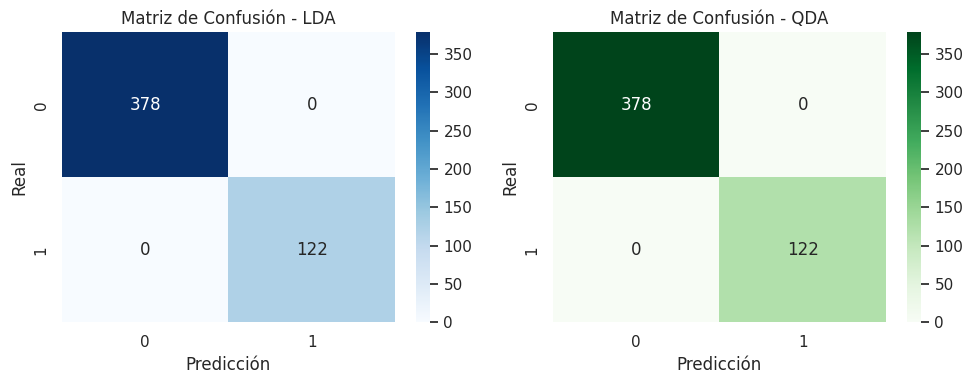

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusión - LDA")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, y_pred_qda), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Matriz de Confusión - QDA")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()



Ambos modelos clasificaron correctamente todos los casos del conjunto de prueba:

- Los 378 clientes sin default fueron predichos correctamente como “no default”.
- Los 122 clientes en default también fueron identificados correctamente.

Esto se refleja en matrices de confusión perfectas, sin falsos positivos ni falsos negativos.

El desempeño idéntico confirma que tanto LDA como QDA separan perfectamente las clases en este conjunto de datos.


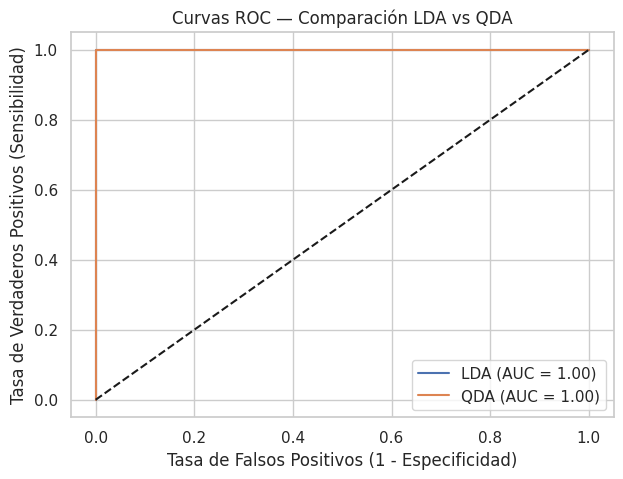

In [ ]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_prob_qda)

roc_auc_lda = auc(fpr_lda, tpr_lda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

plt.figure(figsize=(7, 5))
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {roc_auc_lda:.2f})")
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {roc_auc_qda:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Tasa de Falsos Positivos (1 - Especificidad)")
plt.ylabel("Tasa de Verdaderos Positivos (Sensibilidad)")
plt.title("Curvas ROC — Comparación LDA vs QDA")
plt.legend()
plt.show()


### Curvas ROC — Comparación LDA vs QDA

La curva ROC muestra la relación entre la **tasa de verdaderos positivos** y la **tasa de falsos positivos** para diferentes umbrales de decisión.

En este caso, tanto LDA como QDA alcanzan un **AUC = 1.00**, lo que representa una **separación perfecta** entre las clases:
- La línea de cada modelo llega directamente hasta la esquina superior izquierda (0,1),  
  indicando que identifican correctamente todos los casos positivos sin errores.
- La línea diagonal representa un modelo aleatorio; ambos modelos están muy por encima de ella.

Esto confirma que ambos modelos tienen un poder predictivo máximo:  
distinguen completamente a los clientes que incumplen (default) de los que no.  



## Sección 8: Conclusión Técnica Final

Tras entrenar y comparar los modelos LDA y QDA, ambos alcanzaron un desempeño perfecto en el conjunto de prueba, con una precisión del 100 %, un AUC de 1.00 y matrices de confusión sin errores. Esto demuestra que las variables financieras del dataset permiten una separación completa entre los clientes que incumplen y los que no. Entre los factores más determinantes se encuentran el historial de pagos, la estabilidad laboral, la utilización del crédito y la razón deuda-ingreso, los cuales muestran patrones claros y consistentes con el análisis exploratorio previo. Dado que ambos modelos tuvieron el mismo rendimiento, se recomienda LDA por su menor complejidad y mayor interpretabilidad, ya que logra los mismos resultados con una estructura más simple. Aunque en la práctica un rendimiento perfecto rara vez se presenta debido al ruido e incertidumbre en los datos financieros reales, en este caso el resultado confirma que el preprocesamiento fue correcto, que los modelos se aplicaron adecuadamente y que la información disponible es suficiente para lograr una separación completa entre los diferentes perfiles de riesgo crediticio.
